In [1]:
import os, glob
import numpy as np
import pandas as pd
from calendar import monthrange,month_name
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
fs = 18
plt.rc('font', family='serif')
plt.rc('font', size=18)

In [3]:
# date parser for pandas
dp = lambda x: pd.datetime.strptime(x,'%d-%m-%Y %H:%M:%S')

In [4]:
# paths (must mount volume smb://nrel.gov/shared/wind/WindWeb/MetData/135mData/M5Twr)
# metPathLoHz = '/Volumes/M5Twr/10min/txt/'
metPathLoHz = '/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/'

In [5]:
# time range
years = [2017]
months = [ int(a) for a in np.arange(1,12.1,1) ]

In [6]:
# read in data
filecount = 0
for year in years:
    for month in months:
        fName = glob.glob(os.path.join(metPathLoHz,'{0}_{1}.txt'.format(year,month_name[month])))        
        if len(fName)>0:
            fName = fName[0] ; print(fName)
            df_lo = pd.read_csv(fName,index_col=[0],parse_dates=[0],date_parser=dp,skiprows=[0,1,2,3,4,5,6,8,9],
                               low_memory=False)
            if filecount==0:
                df = df_lo.copy()
            else:
                df = df.append(df_lo.copy())
            filecount += 1
df.index = df.index.tz_localize('UTC').tz_convert('America/Denver')            

/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_January.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_February.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_March.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_April.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_May.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_June.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_July.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_August.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_September.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_October.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_November.txt
/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/2017_December.txt


In [7]:
diurnal_cycle = df.groupby(df.index.hour).mean()

In [8]:
list(diurnal_cycle.columns)

['Record',
 'Version',
 'Input records',
 'Input records QC',
 'Valid records',
 'Valid records QC',
 'Speed (cup_ 130 m)',
 'Speed (cup_ 130 m) QC',
 'd(U)/d(t) (cup_ 130 m)',
 'd(U)/d(t) (cup_ 130 m) QC',
 'Ti (cup_ 130 m)',
 'Ti (cup_ 130 m) QC',
 'Direction (Vane_ 130 m)',
 'Direction (Vane_ 130 m) QC',
 'Std. Dev. Direction (Vane_ 130 m)',
 'Std. Dev. Direction (Vane_ 130 m) QC',
 'Speed (cup_ 130 m).1',
 'Speed (cup_ 130 m) QC.1',
 'Speed (cup_ 122 m)',
 'Speed (cup_ 122 m) QC',
 'd(U)/d(t) (cup_ 122 m)',
 'd(U)/d(t) (cup_ 122 m) QC',
 'Ti (cup_ 122 m)',
 'Ti (cup_ 122 m) QC',
 'Direction (Vane_ 122 m)',
 'Direction (Vane_ 122 m) QC',
 'Std. Dev. Direction (Vane_ 122 m)',
 'Std. Dev. Direction (Vane_ 122 m) QC',
 'Speed (cup_ 122 m).1',
 'Speed (cup_ 122 m) QC.1',
 'Speed (cup_ 105 m)',
 'Speed (cup_ 105 m) QC',
 'd(U)/d(t) (cup_ 105 m)',
 'd(U)/d(t) (cup_ 105 m) QC',
 'Ti (cup_ 105 m)',
 'Ti (cup_ 105 m) QC',
 'Direction (Vane_ 105 m)',
 'Direction (Vane_ 105 m) QC',
 'Std. Dev.

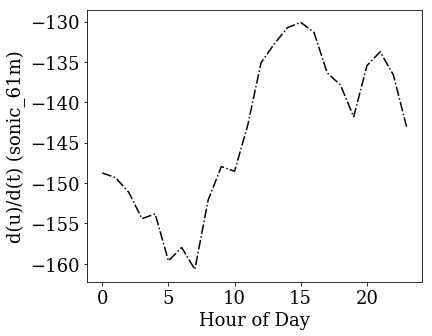

In [9]:
varName = 'd(u)/d(t) (sonic_61m)'

fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)
ax.plot(diurnal_cycle[varName],'-.k')
ax.set_xlabel('Hour of Day')
ax.set_ylabel(varName)

In [10]:
print(metPathLoHz)

/Volumes/shared/Wind/WindWeb/MetData/135mData/M5Twr/10min/txt/
